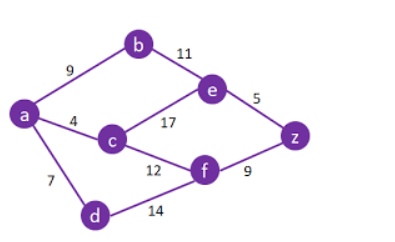

In [1]:
import heapq

def dijkstra(graph, start, target):
    pq = [(0, start)]
    distances = {node: float('inf') for node in graph}
    distances[start] = 0
    parent = {start: None}

    while pq:
        curr_distance, curr_node = heapq.heappop(pq)

        if curr_node == target:
            path = []
            while curr_node:
                path.append(curr_node)
                curr_node = parent[curr_node]
            return path[::-1], distances[target]

        for neighbor, weight in graph[curr_node].items():
            distance = curr_distance + weight
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(pq, (distance, neighbor))
                parent[neighbor] = curr_node

    return None, float('inf')

graph1 = {
    'a': {'b': 9, 'c': 4, 'd': 7},
    'b': {'e': 11},
    'c': {'b': 17, 'f': 12},
    'd': {'f': 14},
    'e': {'z': 5},
    'f': {'z': 9},
    'z': {}
}

path, cost = dijkstra(graph1, 'a', 'z')
print(f"Shortest path: {path}, Cost: {cost}")


Shortest path: ['a', 'c', 'f', 'z'], Cost: 25


In [2]:
from collections import deque

def bfs(start):
    graph = {
        'a': ['b', 'c', 'd'],
        'b': ['e'],
        'c': ['b', 'f'],
        'd': ['f'],
        'e': ['z'],
        'f': ['z'],
        'z': []
    }
    visited = set()
    queue = deque([start])

    while queue:
        vertex = queue.popleft()
        if vertex not in visited:
            print(vertex, end=" ")
            visited.add(vertex)
            queue.extend(neighbor for neighbor in graph[vertex] if neighbor not in visited)

print("BFS for Graph starting from 'a':")
bfs('a')


BFS for Graph starting from 'a':
a b c d e f z 

In [3]:
def dfs(node, visited=set()):
    graph = {
        'a': ['b', 'c', 'd'],
        'b': ['e'],
        'c': ['b', 'f'],
        'd': ['f'],
        'e': ['z'],
        'f': ['z'],
        'z': []
    }
    if node not in visited:
        print(node, end=" ")
        visited.add(node)
        for neighbor in graph[node]:
            dfs(neighbor, visited)

print("\nDFS for Graph starting from 'a':")
dfs('a')



DFS for Graph starting from 'a':
a b e z c f d 

In [4]:
from collections import defaultdict

def add_edge(graph, u, v):
    graph[u].append(v)
    graph[v].append(u)

def detect_cycle_util(graph, node, visited, parent):
    visited[node] = True
    for neighbor in graph[node]:
        if not visited[neighbor]:
            if detect_cycle_util(graph, neighbor, visited, node):
                return True
        elif parent != neighbor:
            return True
    return False

def detect_cycle(graph, nodes):
    visited = {node: False for node in nodes}
    for node in nodes:
        if not visited[node]:
            if detect_cycle_util(graph, node, visited, None):
                return True
    return False

graph = defaultdict(list)
edges = [('a', 'b'), ('a', 'c'), ('a', 'd'), ('b', 'e'), ('c', 'b'), ('c', 'f'), ('d', 'f'), ('e', 'z'), ('f', 'z')]
for u, v in edges:
    add_edge(graph, u, v)

print("Cycle detected in Graph" if detect_cycle(graph, graph.keys()) else "No cycle in Graph")


Cycle detected in Graph


In [5]:
def is_safe(node, graph, color_assign, color):
    return all(color_assign.get(neigh) != color for neigh in graph[node])

def color_graph(graph, nodes, colors, idx=0, color_assign={}):
    if idx == len(nodes):
        return color_assign
    node = nodes[idx]
    for color in colors:
        if is_safe(node, graph, color_assign, color):
            color_assign[node] = color
            result = color_graph(graph, nodes, colors, idx + 1, color_assign)
            if result:
                return result
            color_assign[node] = None
    return None

colors = ['Red', 'Green', 'Blue']
graph = {
    'a': ['b', 'c', 'd'],
    'b': ['a', 'e'],
    'c': ['a', 'b', 'f'],
    'd': ['a', 'f'],
    'e': ['b', 'z'],
    'f': ['c', 'd', 'z'],
    'z': ['e', 'f']
}
nodes = list(graph.keys())

coloring_result = color_graph(graph, nodes, colors)
print("Graph Coloring:")
for node, color in coloring_result.items():
    print(f"Node {node} -> {color}")


Graph Coloring:
Node a -> Red
Node b -> Green
Node c -> Blue
Node d -> Green
Node e -> Red
Node f -> Red
Node z -> Green
